# Project 2: Ames Housing Data & Price Prediction

## Problem Statement

Utilizing the [Ames Housing Data](https://www.kaggle.com/c/dsirfx817/overview) and building regression models (linear, LASSO, ridge), how can we predict the pricing on houses in Ames, Iowa?

"While most people tend to fix up their own house to continue to live in it, there’s a new generation of relatively young entrepreneurs in their 20s and 30s who make a living as house flippers. They buy a house at a low price and live in it while fixing it up– themselves and/or with the help of professionals. Then, after a few months, they “flip” it for more money than they paid for it and invested in it, making a profit ([*source*](https://mmlending.com/the-history-of-house-flipping/))."

There is a workshop presented by Magnolia Homes for attendees interested in buying and reselling homes. The company will share ideas on important features to focus on when fixing up a house.

The metric for accurate price prediction will be measured and evaluated by the root mean squared error of the regression.


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

## Background

Flipping is the act of buying a house (often in poor condition), taking on the repairs and renovations, then quickly selling the refurbished home for a profit ([*source*](https://www.rockethomes.com/blog/home-buying/how-to-flip-a-house).

Known for the show, "Fixer Upper", Joanna and Chip Gaines own a company called Magnolia Homes. The show "documents the process by which the couple revitalizes neighborhoods throughout central Texas as they turn run-down but potential-rich houses into dream homes ([*source*](https://screenrant.com/fixer-upper-chip-gaines-teases-6th-baby-joanna-unsure/))."

Variations of house flipping has always been around, but thanks to TV shows today, the term is better known and affordably more accessible. Although the show makes it look easy, market research, finances, and rennovation skills have to be well thought out for a flipped house to be successful and profitable.


### Data Used:

- [`train.csv`](./datasets/train.csv): Ames Housing Training Dataset
- [`test.csv`](./datasets/test.csv): Ames Housing Testing Dataset

## Data Import & Cleaning

Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

Read in the Data:

In [2]:
train_path = "datasets/train.csv"
test_path = "datasets/test.csv"

kaggle_train = pd.read_csv(train_path)
kaggle_test = pd.read_csv(test_path)
kaggle_train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [3]:
# Looking at null values and data types
kaggle_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Check for Missing Values:

In [4]:
kaggle_train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

High Null Values:
- Alley (140 non-null)
- Fireplace Qu (1051 non-null)
- Pool QC (9 non-null)
- Fence (400 non-null)
- Misc Feature (65 non-null)

I will be dropping all these columns. The reason I am dropping `Alley` is because there are only 140 non-null values and it doesn't seem like a strong characteristic in housing price. I dropped `Fireplace Qu` because there is also `Fireplace` that I could look futher into. I dropped `Pool QC` because there is also the feature `Pool Area` that has no null values. It also only has 9 non-null values. I dropped `Fence` because only 80% of the data is present, and it would be hard to get an accurate representation of the data. I dropped `Misc Feature` because it has only 65 non-null values (less than 5%).

Null values to look into:
- Lot Frontage     1721 non-null
- Mas Vnr Type     2029 non-null *(less than 5% is missing)*
- Mas Vnr Area     2029 non-null *(less than 5% is missing)*
- Bsmt Qual        1996 non-null 
- Bsmt Cond        1996 non-null 
- Bsmt Exposure    1993 non-null 
- BsmtFin Type 1   1996 non-null 
- BsmtFin SF 1     2050 non-null *(less than 5% is missing)*
- BsmtFin Type 2   1995 non-null *(less than 5% is missing)*
- BsmtFin SF 2     2050 non-null 
- Bsmt Unf SF      2050 non-null 
- Total Bsmt SF    2050 non-null 
- Bsmt Full Bath   2049 non-null *(less than 5% is missing)*
- Bsmt Half Bath   2049 non-null *(less than 5% is missing)*
- Garage Type      1938 non-null 
- Garage Yr Blt    1937 non-null
- Garage Finish    1937 non-null
- Garage Cars      2050 non-null *(less than 5% is missing)*
- Garage Area      2050 non-null *(less than 5% is missing)*
- Garage Qual      1937 non-null
- Garage Cond      1937 non-null

#### Although there are many null values to look into, I will first look at correlation of `SalePrice` with these features to determine which features I should further look into and clean.

In [5]:
# Removing the index since Id is an index
kaggle_train.set_index("Id", inplace = True)

In [6]:
# Dropping columns with high null values:
kaggle_train = kaggle_train.drop(columns=['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature'])

### Looking at `Total Bsmt SF` null values:

In [7]:
# Looking at null values for 'Total Bsmt SF'
kaggle_train[kaggle_train['Total Bsmt SF'].isnull()][['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1','BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath','Bsmt Half Bath']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
Id,,,,,,,,,,,
1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is only 1 row with the null values, therefore I am going to infer that this property does not have a basement and will turn the null value into 0.

In [8]:
# Filling in null values with 0
kaggle_train['Total Bsmt SF'] = kaggle_train['Total Bsmt SF'].fillna(0)
kaggle_train['BsmtFin SF 1'] = kaggle_train['BsmtFin SF 1'].fillna(0)
kaggle_train['BsmtFin SF 2'] = kaggle_train['BsmtFin SF 2'].fillna(0)
kaggle_train['Bsmt Unf SF'] = kaggle_train['Bsmt Unf SF'].fillna(0)

### `Garage Area`:

In [9]:
# Filling in null 'Garage Area' values with 0
kaggle_train['Garage Area'] = kaggle_train['Garage Area'].fillna(0)

In [10]:
kaggle_train.head(2)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000


### `Garage Cars`:

There is only 1 null value for `Garage Cars`. Looking further into it, it is interesting how the `Garage Type` is detached, but that the `Garage Area` is 0. Because the rest of the values for the garage features are NaN, I am going to infer that the property does not have a garage and change Garage Cars to 0.

In [11]:
pd.set_option('display.max_columns', None)
kaggle_train[kaggle_train['Garage Cars'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,0.0,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [12]:
# Filling in null 'Garage Cars' values with 0
kaggle_train['Garage Cars'] = kaggle_train['Garage Cars'].fillna(0)

### `Garage Yr Blt`:

In [13]:
# Looking at null values for 'Garage Yr Blt'
kaggle_train[kaggle_train['Garage Yr Blt'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2243,911103060,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,0,6,2007,WD,119600
330,923226250,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,0,3,2010,WD,76000
2278,923202134,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,0,12,2007,New,147000
2235,910201050,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,0,9,2007,WD,129850
2084,905476170,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,923204150,90,RL,94.0,9400,Pave,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,0,4,2010,WD,139000
2880,911175410,30,C (all),69.0,12366,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,0,10,2006,WD,51689
2628,535456010,90,RL,75.0,8512,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,9,2006,WD,119000


Because there is about 5.64% missing, I decided to change the null values to the Year Built. Although, not all values are are the same from Year Built with Garage Year Built, it made the most sense instead of doing mean, median, or mode.

In [14]:
# Filling in 'Garage Yr Blt' null values with 'Year Built'
kaggle_train['Garage Yr Blt'] = kaggle_train['Garage Yr Blt'].fillna(kaggle_train['Year Built'])

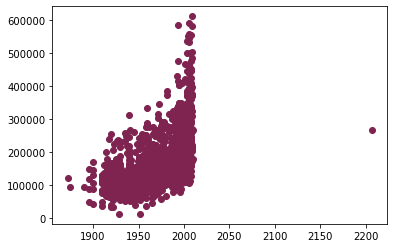

In [15]:
# Scatter plot of 'Garage Yr Blt' and 'SalePrice'
sns.set_palette(sns.color_palette("twilight_shifted_r"))
plt.scatter(kaggle_train['Garage Yr Blt'],
            kaggle_train['SalePrice']);

In [16]:
kaggle_train['Garage Yr Blt'].max()

2207.0

In [17]:
# Removing the 'Garage Yr Blt' outlier
kaggle_train = kaggle_train[kaggle_train['Garage Yr Blt'] != 2207.0]

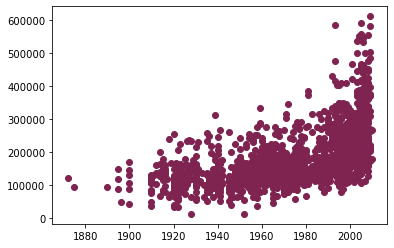

In [18]:
# Scatter plot of 'Garage Yr Blt' and 'SalesPrice' after outlier was removed 
plt.scatter(kaggle_train['Garage Yr Blt'],
            kaggle_train['SalePrice']);

### `Mas Vnr Area`:

In [19]:
# Looking at null values in 'Mas Vnr Area'
kaggle_train[kaggle_train['Mas Vnr Area'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2393,528142010,60,RL,103.0,12867,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,0,7,2006,New,344133
2383,528110050,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,465000
539,531371050,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,184900
518,528458020,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,225000
2824,908130020,20,RL,75.0,8050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,2002.0,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,0,4,2006,WD,117250
1800,528458150,60,FV,112.0,12217,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,0,12,2007,New,310013
1455,907251090,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,237000
1120,528439010,20,RL,87.0,10037,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,0,8,2008,WD,247000
1841,533208040,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,199900


In [20]:
# Removing null value by changing it to 0
kaggle_train['Mas Vnr Area'] = kaggle_train['Mas Vnr Area'].fillna(0)

I changed the null value in 'Mas Vnr Area' to 0 because I figured that the house did not have a masonry veneer, so therefore, the square feet of it would be 0.

## Exploratory Data Analysis

### Correlation

In [21]:
# Correlation between Sale Price and non-categorical features
kaggle_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800078
Gr Liv Area        0.697173
Garage Area        0.650016
Garage Cars        0.647825
Total Bsmt SF      0.629090
1st Flr SF         0.618284
Year Built         0.571592
Garage Yr Blt      0.555879
Year Remod/Add     0.550112
Full Bath          0.537794
TotRms AbvGrd      0.504316
Mas Vnr Area       0.504061
Fireplaces         0.470936
BsmtFin SF 1       0.423825
Lot Frontage       0.341982
Open Porch SF      0.333990
Wood Deck SF       0.326433
Lot Area           0.296794
Bsmt Full Bath     0.284223
Half Bath          0.283511
2nd Flr SF         0.248968
Bsmt Unf SF        0.190483
Bedroom AbvGr      0.137681
Screen Porch       0.134775
3Ssn Porch         0.048800
Mo Sold            0.032217
Pool Area          0.023147
BsmtFin SF 2       0.016590
Misc Val          -0.007329
Yr Sold           -0.014896
Low Qual Fin SF   -0.041549
Bsmt Half Bath    -0.045208
MS SubClass       -0.086919
Overall Cond      -0.096784
Kitchen AbvGr     -0

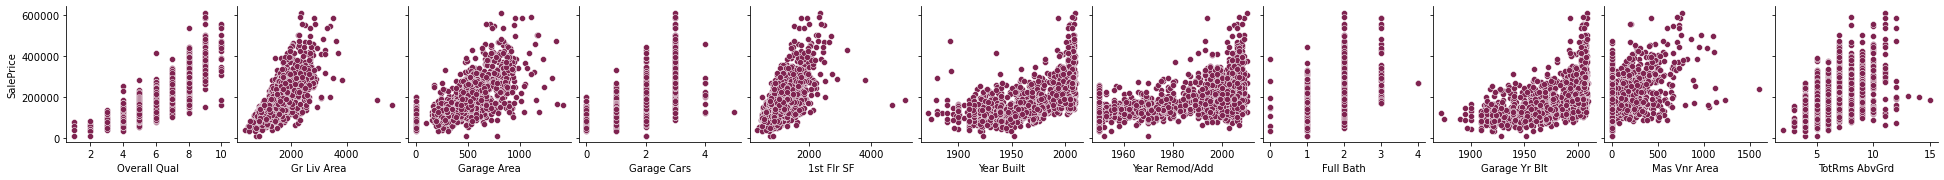

In [22]:
# Pair plot for features with over 0.50 correlation to 'SalePrice'
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
                                                               '1st Flr SF', 'Year Built',
                                                               'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area',
                                                                'TotRms AbvGrd'], diag_kind=None);

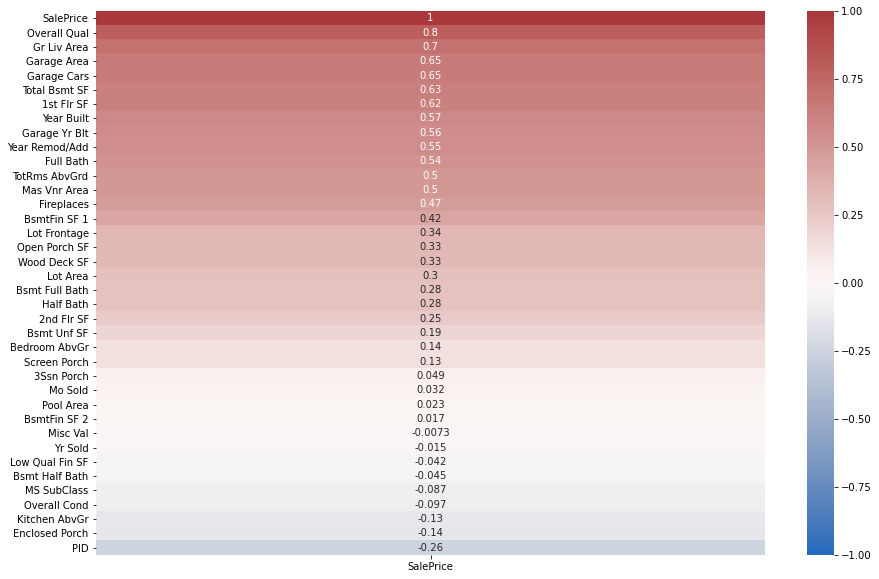

In [23]:
# Heatmap of correlation of 'SalePrice' with non-categorical features

plt.figure(figsize=(15,10))
sns.heatmap(kaggle_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True,
            vmin=-1, vmax=1,
            cmap='vlag'
           );

I will be starting with the features that are above 0.60:
- Overall Qual       0.800207
- Gr Liv Area        0.697038
- Garage Area        0.650270
- Garage Cars        0.648220
- 1st Flr SF         0.618486

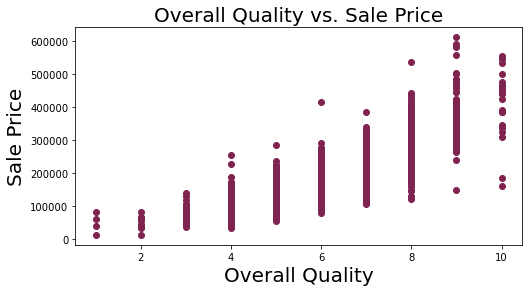

In [24]:
# Size of the figure
plt.figure(figsize=(8, 4))

# Create scatterplot
plt.scatter(kaggle_train['Overall Qual'],
            kaggle_train['SalePrice']);

# Customizations
plt.title("Overall Quality vs. Sale Price", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("Overall Quality", fontsize = 20);

There seems to be some outliers for overall quality vs sale price, but overall, does not seem too drastic.

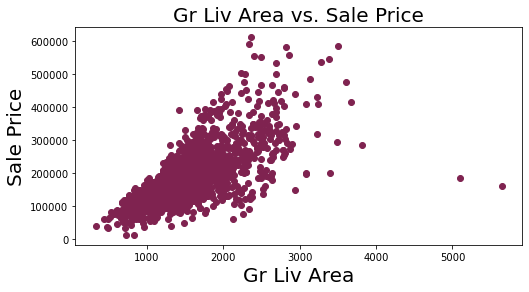

In [25]:
# Size of the figure
plt.figure(figsize=(8, 4))

# Create scatterplot
plt.scatter(kaggle_train['Gr Liv Area'],
            kaggle_train['SalePrice']);

# Customizations
plt.title("Gr Liv Area vs. Sale Price", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("Gr Liv Area", fontsize = 20);

Seems like there may be some outliers towards the Gr Liv Area over 5000 and sale price being under 200000.

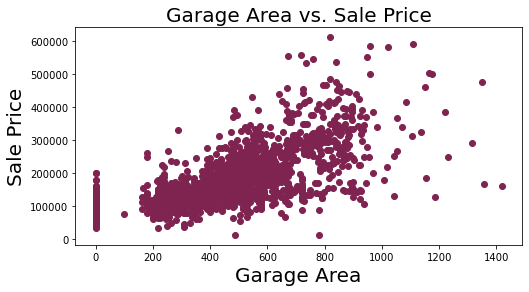

In [26]:
# Size of the figure
plt.figure(figsize=(8, 4))

# Create scatterplot
plt.scatter(kaggle_train['Garage Area'],
            kaggle_train['SalePrice']);

# Customizations
plt.title("Garage Area vs. Sale Price", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("Garage Area", fontsize = 20);

There seems to be a cluster in 0 Garage Area with prices still going up. There are a bit of outliers towards the higher end of the garage area.

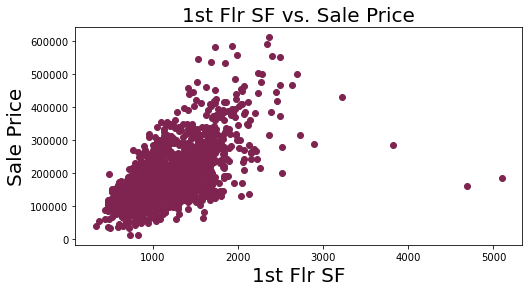

In [27]:
# Size of the figure
plt.figure(figsize=(8, 4))

# Create scatterplot
plt.scatter(kaggle_train['1st Flr SF'],
            kaggle_train['SalePrice']);

# Customizations
plt.title("1st Flr SF vs. Sale Price", fontsize = 20)
plt.ylabel("Sale Price", fontsize = 20)
plt.xlabel("1st Flr SF", fontsize = 20);

There are outliers in 1st Flr SF with values of over 3000.

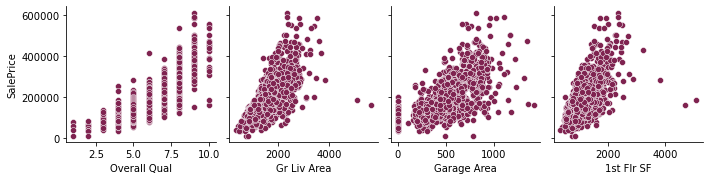

In [28]:
# Pair plot of above scatter plots
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF'])

### Removing Outliers - Numerical Features (Above 0.60 Correlation)

In [29]:
# Looking at Gr Liv Area outliers
kaggle_train[kaggle_train['Gr Liv Area'] > 4000]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,160000
2181,908154195,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,183850


In [30]:
# Removing outliers
kaggle_train = kaggle_train[kaggle_train['Gr Liv Area'] < 4000]

In [31]:
# Looking at 1st Flr SF outliers
kaggle_train[kaggle_train['1st Flr SF'] > 3000]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1773,528366050,20,RL,NaN,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231.0,Unf,0.0,1969.0,3200.0,GasA,Ex,Y,SBrkr,3228,0,0,3228,1.0,0.0,3,0,4,1,Gd,10,Typ,1,Attchd,1992.0,RFn,2.0,546.0,TA,TA,Y,264,75,291,0,0,0,0,5,2007,WD,430000
1498,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,284700


In [32]:
# Removing outliers
kaggle_train = kaggle_train[kaggle_train['1st Flr SF'] < 3000]

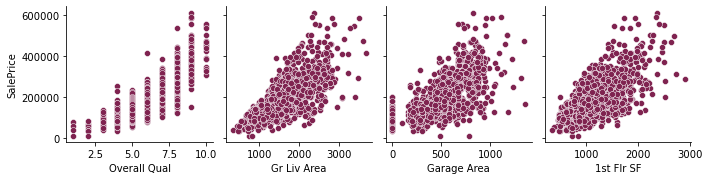

In [33]:
# Outliers removed
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF'])

### Categorical Features

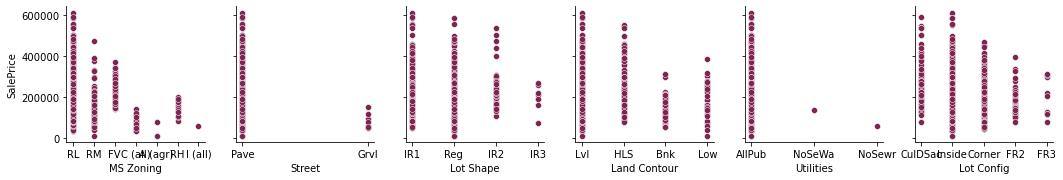

In [34]:
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config']);

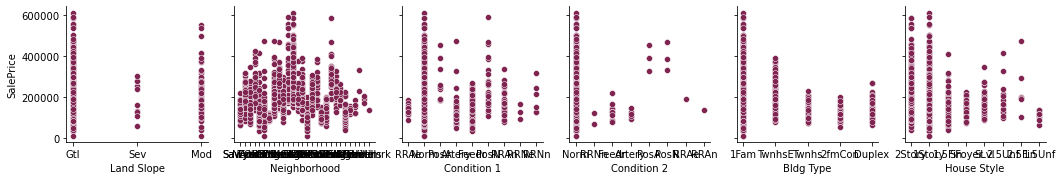

In [35]:
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style']);

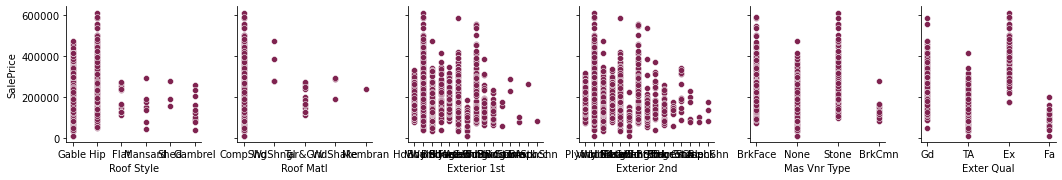

In [36]:
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual']);

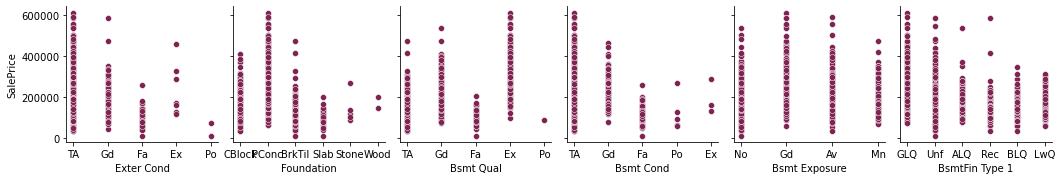

In [37]:
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1']);

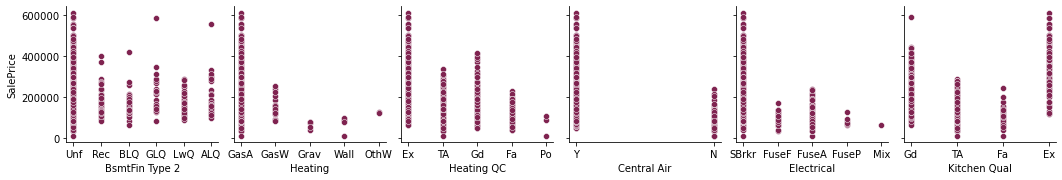

In [38]:
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual']);

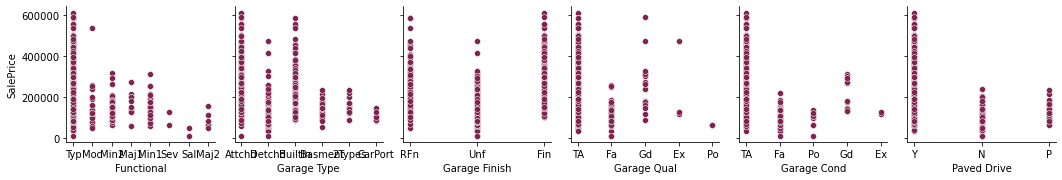

In [39]:
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars =['Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive']);

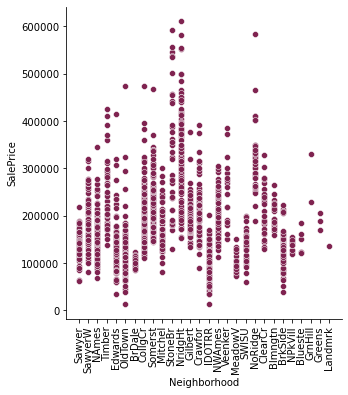

In [40]:
sns.pairplot(data=kaggle_train, y_vars=['SalePrice'], x_vars = ['Neighborhood'], height=5)
plt.xticks(rotation="90");

Looking at the pair plots for the categorical data, `Neighborhood` should be looked further into.

### `Neighborhood`:

In [41]:
# Looking at the different neighborhoods
kaggle_train['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

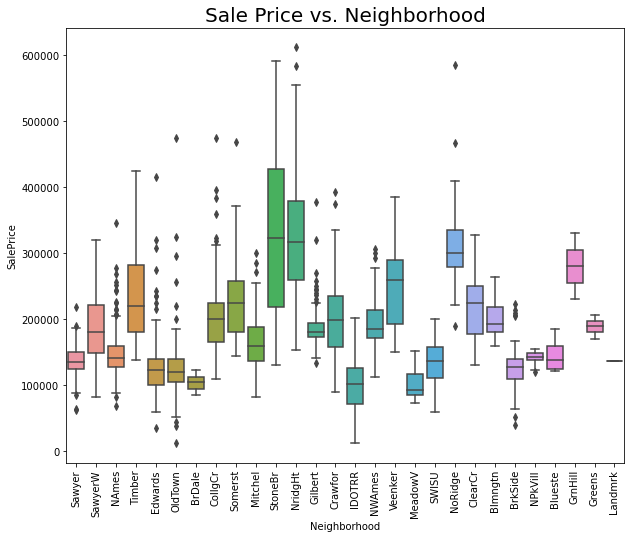

In [42]:
# Utilizing a box plot to see the sale price vs. neighborhood
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(data=kaggle_train, x='Neighborhood', y='SalePrice')
plt.title('Sale Price vs. Neighborhood', fontsize = 20)
plt.xticks(rotation="90");

From the above boxplot, there seems to be a good spread of neighborhoods in the 150000, 200000, and a smaller amount in the 300000 sale price range.

To be able to utilize this feature in the model I will use pd.get_dummies to one-hot encode it.

In [43]:
# Looking at Landmrk
kaggle_train[kaggle_train['Neighborhood'] == 'Landmrk']

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2789,907230240,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,0,6,2006,WD,137000


In [44]:
# There are no properties in Landmark so I am going to remove
kaggle_train = kaggle_train[kaggle_train['Neighborhood'] != 'Landmrk']

## Preprocessing and Modeling

#### Linear Regression Model with Initial Numerical Features

I chose to fit and score a linear regression on some of the features that I chose from just the numerical dataset.

In [45]:
# Numeric data columns
kaggle_train._get_numeric_data().columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

#### Creating a Function for Linear Regression Train-Test:

In [46]:
def linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
    lr = LinearRegression()
    lr_fit_train_test = lr.fit(X_train, y_train)
    
    #Baseline Score
    lr_fit = lr.fit(X, y)
    lr_score = lr.score(X, y)
    cross_val_xy = cross_val_score(lr, X, y)
    rmse_lr = mean_squared_error(y_true=y, y_pred=lr.predict(X), squared=False)
    
    #Train-Test Split
    cross_val = cross_val_score(lr, X_train, y_train)
    r2_train = lr.score(X_train, y_train)
    r2_test = lr.score(X_test, y_test)
    
    rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train), squared=False)
    rmse_test = mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test), squared=False)
    
    # Prediction and Residuals
    lr_preds = lr.predict(X_test)
    lr_residuals = lr_preds - y_test
   
    # Residuals Plot
    plt.scatter(lr_residuals.index, lr_residuals)
    plt.title("Residuals", fontsize = 15)
    plt.ylabel("Actual Values", fontsize = 15)
    plt.xlabel("Predicted Values", fontsize = 15)
    
    print(f'Linear Regression R^2: {lr_score}')
    print(f'Linear Regression Cross Validation: {cross_val_xy}')
    print(f'Root Mean Squared Error: {rmse_lr}')
    print('')
    print(f'Linear Regression Train Cross Validation: {cross_val}')
    print(f'Linear Regression Train R^2: {r2_train}')
    print(f'Linear Regression Test R^2: {r2_test}')
    print(f'Root Mean Squared Error Train: {rmse_train}')
    print(f'Root Mean Squared Error Test: {rmse_test}')

Linear Regression R^2: 0.8062052827081807
Linear Regression Cross Validation: [0.78257156 0.8232754  0.8172738  0.81362269 0.78935661]
Root Mean Squared Error: 34822.161033418866

Linear Regression Train Cross Validation: [0.79565059 0.81897024 0.83345795 0.83550567 0.83921651]
Linear Regression Train R^2: 0.8300471076664411
Linear Regression Test R^2: 0.7996075195104637
Root Mean Squared Error Train: 33924.42642899269
Root Mean Squared Error Test: 35043.00139346885


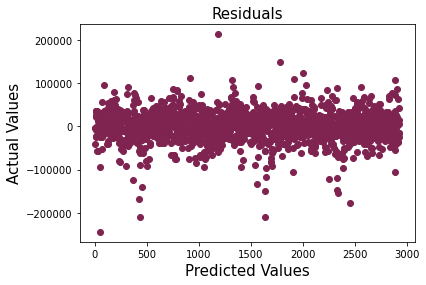

In [47]:
# Defining X and y variables
# Using the features that are above 0.60 correlation wit 'SalePrice'
X = kaggle_train[['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF', 'Garage Cars']]
y = kaggle_train['SalePrice']

linear_regression(X,y)

I got an R-square of 0.806 and 34822.16 for RMSE. This is a pretty good initial score.

With this train-test model, the RMSE in the train set has a better RMSE than the test set. This means that the model is not generalizing well to "new" data.

### Adding in Categorical Features to Linear Regression Model

In [48]:
X = kaggle_train[['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF', 'Garage Cars', 'Neighborhood']]

# One-hot encoding 'Neighborhood'
X = pd.get_dummies(columns=['Neighborhood'], drop_first=True, data=X)
X.head()

,Overall Qual,Gr Liv Area,Garage Area,1st Flr SF,Garage Cars,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,6,1479,475.0,725,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
544,7,2122,559.0,913,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
153,5,1057,246.0,1057,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
318,5,1444,400.0,744,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
255,6,1445,484.0,831,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Linear Regression: Model 1

Linear Regression R^2: 0.8425496320409648
Linear Regression Cross Validation: [0.81749793 0.86223747 0.84566241 0.83248548 0.8257338 ]
Root Mean Squared Error: 31387.49036171975

Linear Regression Train Cross Validation: [0.80089314 0.79966305 0.81454876 0.86930483 0.87212928]
Linear Regression Train R^2: 0.859640391882248
Linear Regression Test R^2: 0.8378190184965997
Root Mean Squared Error Train: 30829.700600548433
Root Mean Squared Error Test: 31525.395782272877


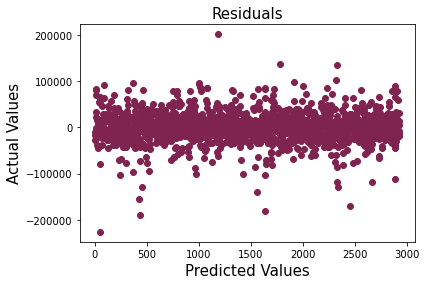

In [49]:
linear_regression(X,y)

By, adding the `Neighborhood` feature in, we have improved the test RMSE from 35043.00 to 31525.39.
The model still has a lower RMSE train compared to the test set.

#### LASSO Regression: Model 1

#### Creating a Function for LASSO Regression Train-Test:

In [50]:
def lasso_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    ss = StandardScaler()
    ss.fit(X_train)
    
    Z_train = ss.transform(X_train)
    Z_test = ss.transform(X_test)
    
    lasso = LassoCV(n_alphas=200)
    lasso_scores = cross_val_score(lasso, Z_train, y_train, cv=3)
    
    
    mean_std = lasso_scores.mean(), lasso_scores.std()
    lasso.fit(Z_train, y_train)
    alpha = lasso.alpha_
    coefficient = lasso.coef_
    
    r2_train = lasso.score(Z_train, y_train)
    r2_test = lasso.score(Z_test, y_test)
    
    rmse_train = mean_squared_error(y_true=y_train, y_pred=lasso.predict(Z_train), squared=False)
    rmse_test = mean_squared_error(y_true=y_test, y_pred=lasso.predict(Z_test), squared=False)
    
    lasso_preds = lasso.predict(Z_test)
    lasso_residuals = lasso_preds - y_test
    
    plt.scatter(lasso_residuals.index, lasso_residuals)
    plt.title('Residuals', fontsize = 15)
    plt.ylabel("Actual Values", fontsize = 15)
    plt.xlabel("Predicted Values", fontsize = 15)
    
    print(f'Lasso Train Cross Validation: {lasso_scores}')
    print(f'Lasso R^2 Mean & Standard Dev.: {mean_std}')
    print(f'Lasso Alpha: {alpha}')
    print(f'Lasso Coefficients: {coefficient}')
    print(f'Lasso R^2 Train: {r2_train}')
    print(f'Lasso R^2 Test: {r2_test}')
    print(f'Lasso RMSE Train: {rmse_train}')
    print(f'Lasso RMSE Test: {rmse_test}')

Next, I added all numerical features, but removed features with low or 0 coefficients. I also removed some neighbhorhoods with 0 coefficeints:

In [51]:
kaggle_train = kaggle_train[kaggle_train['Neighborhood'] != 'SWISU']
kaggle_train = kaggle_train[kaggle_train['Neighborhood'] != 'Veenker']
kaggle_train = kaggle_train[kaggle_train['Neighborhood'] != 'GrnHill']
kaggle_train = kaggle_train[kaggle_train['Neighborhood'] != 'Sawyer']

In [52]:
features = ['MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add','Total Bsmt SF','Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Enclosed Porch', 'Screen Porch',
           'Blueste', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SawyerW', 'Somerst', 'StoneBr', 'Timber']

dummy = pd.get_dummies(kaggle_train['Neighborhood'], drop_first=True)
kaggle_train = pd.concat([kaggle_train, dummy], axis=1)

X = kaggle_train[features]
y = kaggle_train['SalePrice']

kaggle_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SawyerW,Somerst,StoneBr,Timber
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
138,535126040,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,0,6,2010,WD,190000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Lasso Train Cross Validation: [0.87333355 0.86009376 0.86426168]
Lasso R^2 Mean & Standard Dev.: (0.8658963300974483, 0.00552733026353429)
Lasso Alpha: 443.19334509252167
Lasso Coefficients: [-5268.44977965  7188.88599401 18699.45715559  5194.03287782
 15076.37479282  3078.30000243 15222.58431001 31922.04017796
 -8277.65893308 -2338.72350794  4467.85341249    54.6361528
  4221.01618733    -0.            -0.          1423.13439526
    -0.            -0.          3905.78678058     0.
 -1151.59871411     0.           566.40080701   487.72955583
    -0.            -0.             0.         -3097.03022236
  4355.7270738  12025.6321298   -357.18312942 -1124.35312708
  2355.59904727  7215.15331958     0.        ]
Lasso R^2 Train: 0.8774326361647172
Lasso R^2 Test: 0.878667102795209
Lasso RMSE Train: 29353.420452592007
Lasso RMSE Test: 24989.160248181746


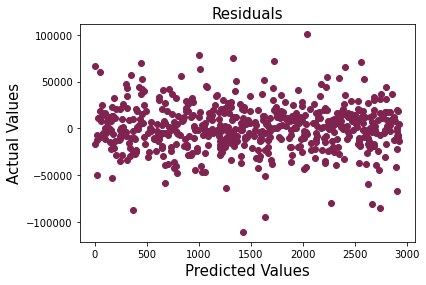

In [53]:
lasso_regression(X,y)

Above shows the LASSO RMSE train is 29353.42 and the RMSE test is 24989.16. This is better than the baseline model because the test is doing better than the train. The RMSE is also lower when compared to the baseline model.

#### Ridge Regression: Model 1

#### Creating a Function for Ridge Regression Train-Test:

In [54]:
def ridge_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    ss = StandardScaler()
    ss.fit(X_train)
    
    Z_train = ss.transform(X_train)
    Z_test = ss.transform(X_test)
    ridge = RidgeCV(alphas=np.linspace(0.1, 10, 100))
    ridge.fit(Z_train, y_train)
    
    coefficient = ridge.coef_
    
    train_score = ridge.score(Z_train, y_train)
    test_score = ridge.score(Z_test, y_test)
    ridge_preds = ridge.predict(Z_test)
    ridge_residuals = ridge_preds - y_test
    plt.scatter(ridge_residuals.index, ridge_residuals);
    
    rmse_train = mean_squared_error(y_true=y_train, y_pred=ridge.predict(Z_train), squared=False)
    rmse_test = mean_squared_error(y_true=y_test, y_pred=ridge.predict(Z_test), squared=False)
    
    print(f'Ridge Coefficients: {coefficient}')
    print(f'R^2 Train Score: {train_score}')
    print(f'R^2 Test Score: {test_score}')
    print(f'RMSE Train: {rmse_train}')
    print(f'RMSE Test: {rmse_test}')

Ridge Coefficients: [-5745.56149237  7750.46423361 17950.05718518  5959.3758178
 17284.24741859  3256.57808758 15124.22120221 30987.64077169
 -9292.28548645 -2561.65131333  6423.96601292   800.34807881
  4674.29104507    39.42446879   686.18312139  3061.50270571
   280.65738366   930.01594317  5314.50948903  1463.54822795
  -759.24782179   372.02831371  2273.64233631  1657.27966063
   414.98646133  1564.53474555   580.42932216 -2613.16404703
  5412.36081515 13120.14947716  1099.39201692  -582.81763763
  3749.5556791   8148.20767516   864.4475284 ]
R^2 Train Score: 0.8783959098880278
R^2 Test Score: 0.8777522426182665
RMSE Train: 29237.84664840005
RMSE Test: 25083.19350391393


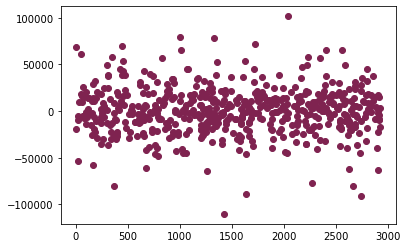

In [55]:
ridge_regression(X,y)

### Model 2: Linear & LASSO Regression

Lasso Train Cross Validation: [0.88352647 0.87489091 0.86744868]
Lasso R^2 Mean & Standard Dev.: (0.8752886883890811, 0.006569751547429098)
Lasso Alpha: 292.20571647970957
Lasso Coefficients: [-5078.13449802  6052.73115361 16738.94292031  5341.66935487
 13352.45651078  3682.83952608 13573.15539935 28582.1926553
 -7392.60679323 -2129.74704639  4524.60407551   111.8255683
  3714.30431761  6961.91433254  7463.80546138  -942.39575195
  1885.25133616   162.37959303  4766.83993942   550.53581623
  -129.32694751  1162.7844823    828.99862121   -59.50460185
  -270.79007472 -3877.63333926  2912.00464145  9860.09861318
  -842.58564379  2066.0216824   7579.31216627]
Lasso R^2 Train: 0.8862612971121852
Lasso R^2 Test: 0.8882852966897067
Lasso RMSE Train: 28276.485397366083
Lasso RMSE Test: 23978.253449085212


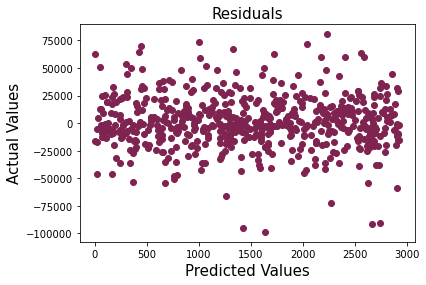

In [56]:
features_2 = ['MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add','Total Bsmt SF','Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Enclosed Porch', 'Screen Porch', 'Garage Area', 'Mas Vnr Area',
        'BrDale', 'BrkSide', 'ClearCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge',
       'NridgHt', 'SawyerW', 'Somerst', 'StoneBr']

X = kaggle_train[features_2]
y = kaggle_train['SalePrice']

lasso_regression(X,y)

Linear Regression R^2: 0.8882018529732403
Linear Regression Cross Validation: [0.87971865 0.88418168 0.88784707 0.87498897 0.87439524]
Root Mean Squared Error: 26924.049114084173

Linear Regression Train Cross Validation: [0.7970062  0.86175707 0.83166147 0.88065134 0.88624965]
Linear Regression Train R^2: 0.8756272251534238
Linear Regression Test R^2: 0.8913035471646376
Root Mean Squared Error Train: 28293.83710185913
Root Mean Squared Error Test: 26571.278932673245


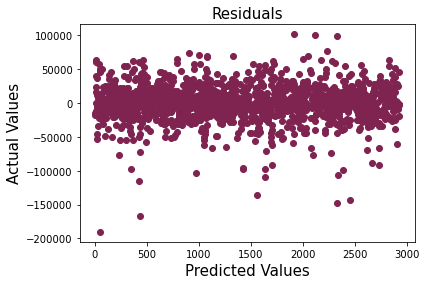

In [57]:
linear_regression(X,y)

For Model 2, I added `Garage Area` and `Mas Vnr Area`. I also played around with the different neighborhoods and removed the ones with coefficient of 0.

I submitted the LASSO regression to Kaggle because the RMSE is lower when compared to the linear regression model (RMSE 23978.25 vs. 26571.27).

Note: In Kaggle, the 2nd submission is without `Garage Area` (RMSE: 31573.83) and the 3rd submission is with (RMSE: 31708.66).

In general, when comparing model 2 to model 1, we see that the RMSE is lower. Because we didn’t change the model too drastically, the RMSE didn't seem to change too much. 

### Model 3: Linear & LASSO Regression

#### Adding in More Categorical Data: `Kitchen Qual`, `Exter Qual`, `Bsmt Exposure`

In [58]:
kaggle_train3 = kaggle_train[['MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add','Total Bsmt SF','Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Enclosed Porch', 'Screen Porch', 'Garage Area', 'Mas Vnr Area',
        'Neighborhood', 'Kitchen Qual', 'Exter Qual', 'Bsmt Exposure']]

dummy_3 = pd.get_dummies(columns = ['Neighborhood', 'Kitchen Qual', 'Exter Qual', 'Bsmt Exposure'], drop_first=True, data=kaggle_train3)
kaggle_train3 = pd.concat([kaggle_train3, dummy_3], axis=1)

kaggle_train3.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Garage Area,Mas Vnr Area,Neighborhood,Kitchen Qual,Exter Qual,Bsmt Exposure,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Garage Area,Mas Vnr Area,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,559.0,132.0,SawyerW,Gd,Gd,No,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,559.0,132.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
153,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,246.0,0.0,NAmes,Gd,TA,No,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,246.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
318,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,400.0,0.0,Timber,TA,TA,No,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,400.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
255,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,484.0,0.0,SawyerW,TA,TA,No,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,484.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
138,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,578.0,0.0,NAmes,Gd,Gd,No,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,578.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [59]:
kaggle_train3 = kaggle_train3.loc[:,~kaggle_train3.columns.duplicated()]

In [60]:
features_3 = ['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Garage Area', 'Mas Vnr Area', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Kitchen Qual_Fa',
       'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Exter Qual_Fa', 'Exter Qual_Gd',
       'Exter Qual_TA', 'Bsmt Exposure_Gd', 'Bsmt Exposure_Mn',
       'Bsmt Exposure_No']

X = kaggle_train3[features_3]
y = kaggle_train['SalePrice']

Lasso Train Cross Validation: [0.91350886 0.90451359 0.90176207]
Lasso R^2 Mean & Standard Dev.: (0.9065948399242575, 0.005016334978810556)
Lasso Alpha: 118.50288099717004
Lasso Coefficients: [ -6097.84895183   4606.63202594  10343.93427849   5973.78862539
  13951.48557906   2880.1117951   10528.73443673  27460.35704647
  -3941.34185165  -2411.57079298   2895.09630083    820.16675582
   3499.76864647   5920.49409342   4846.0633155    -379.30109434
   1409.5012181    4573.02701531   -941.23043253    150.55627716
    -77.61375674    101.06638362   -155.63360861  -1155.24110978
    535.81372912  -2183.46499303   4974.49360929   6286.07923653
  -1146.8001697    -768.88354771   3482.71386703   5291.36743873
  -4933.3611773  -17049.51671797 -18461.53961808  -3879.61305966
 -17067.87277886 -18341.84869175   6079.89710493  -1767.7535411
  -4083.64520793]
Lasso R^2 Train: 0.9170579569376092
Lasso R^2 Test: 0.9051023375499745
Lasso RMSE Train: 24146.748407495445
Lasso RMSE Test: 22099.8911974134

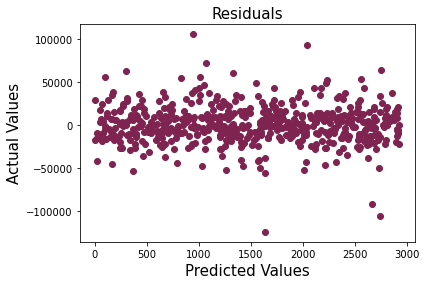

In [61]:
lasso_regression(X,y)

Linear Regression R^2: 0.9151522622427368
Linear Regression Cross Validation: [0.90852261 0.91582401 0.9159176  0.89240788 0.90133819]
Root Mean Squared Error: 23455.41952168289

Linear Regression Train Cross Validation: [0.88486563 0.85141698 0.84315992 0.91273683 0.92574313]
Linear Regression Train R^2: 0.9073028697728425
Linear Regression Test R^2: 0.9170874340715486
Root Mean Squared Error Train: 24426.561238790597
Root Mean Squared Error Test: 23206.783486356555


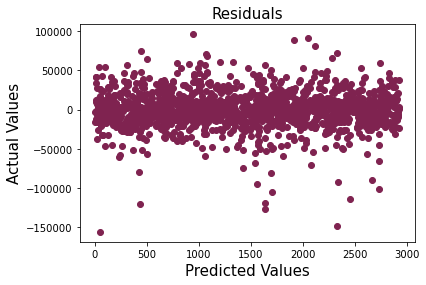

In [62]:
linear_regression(X,y)

For model 3, I added: `Kitchen Qual`, `Exter Qual`, and `Bsmt Exposure`. By doing this, it further decreased my testing RMSE to 22099.89 (LASSO regression). These 3 features ended up creating negative coefficients for my model, which means that these features bring down the value of home depending on what the quality or exposure is.

But, these features did lower the root mean squared error. For both the LASSO and linear regression model, the test is doing better than the train root mean squared error.


### Creating Final Train Datasets

#### Final Train 1 Dataset

In [63]:
train_final = kaggle_train[features]
train_final.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SawyerW,Somerst,StoneBr,Timber
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
153,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
318,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
255,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
138,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [64]:
train_final.shape

(1883, 35)

In [65]:
train_final.to_csv('./datasets/train_final.csv', index=True)

#### SalePrice Dataset

In [66]:
sale_price = pd.DataFrame(kaggle_train[['SalePrice']])
sale_price

,SalePrice
Id,
544,220000
153,109000
318,174000
255,138500
138,190000
...,...
1587,298751
785,82500
916,177000


In [67]:
sale_price.shape

(1883, 1)

In [68]:
sale_price.to_csv('./datasets/saleprice.csv', index=True)

#### Final Train 2 Dataset

In [69]:
train_final2 = kaggle_train[features_2]
train_final2.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Garage Area,Mas Vnr Area,BrDale,BrkSide,ClearCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,SawyerW,Somerst,StoneBr
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,559.0,132.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
153,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,246.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
318,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,400.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
255,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,484.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
138,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,578.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
train_final2.shape

(1883, 31)

In [71]:
train_final2.to_csv('./datasets/train_final_2.csv', index=True)

#### Final Train 3 Dataset

In [72]:
train_final3 = kaggle_train3[features_3]
train_final3.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Garage Area,Mas Vnr Area,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,559.0,132.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
153,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,246.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
318,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,400.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
255,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,484.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
138,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,578.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [73]:
train_final3.to_csv('./datasets/train_final_3.csv', index=True)

### Cleaning Test Dataset

In [74]:
kaggle_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [75]:
# Looking at null values and datat types
kaggle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [76]:
# Removing the index since Id is an index
kaggle_test.set_index("Id", inplace = True)

In [77]:
# Features used in Model 1
features = ['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch', 'Neighborhood']


In [78]:
kaggle_test1 = kaggle_test[features]

In [79]:
kaggle_test1.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Neighborhood'],
      dtype='object')

In [80]:
kaggle_test1.isnull().sum()

MS SubClass       0
Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Total Bsmt SF     0
Gr Liv Area       0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Enclosed Porch    0
Screen Porch      0
Neighborhood      0
dtype: int64

In [81]:
# One-hot Encoding 'Neighborhood'
dummy_neighborhood = pd.get_dummies(kaggle_test1['Neighborhood'], drop_first=True)
kaggle_test1 = pd.concat([kaggle_test1, dummy_neighborhood], axis=1)

In [82]:
# Dropping 'Neighborhood'
kaggle_test1.drop(columns=['Neighborhood'], inplace=True)

In [83]:
# Checking Columns
kaggle_test1.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'Greens', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer',
       'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [84]:
# Removing 'Neighborhood' not in Model 1
kaggle_test1.drop(columns=['Veenker', 'Sawyer', 'SWISU'], inplace=True)

In [85]:
X_test = kaggle_test1[['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'Greens', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SawyerW', 'Somerst', 'StoneBr', 'Timber']]

In [86]:
# Shape of Test
kaggle_test1.shape

(879, 35)

In [87]:
# Defining Train
X_train = train_final
X_train.shape

(1883, 35)

In [88]:
# Defining Test
X_test = kaggle_test1
X_test.shape

(879, 35)

In [89]:
# Defining y
y_final = sale_price
y_final.shape

(1883, 1)

#### Linear Regression: Model 1 (Test Dataset)

Linear Regression R^2: 0.8799678138951876
Linear Regression Cross Validation: [0.87008686 0.87480575 0.88256946 0.86319167 0.86482525]
Root Mean Squared Error: 27897.926727090362

Linear Regression Train Cross Validation: [0.80045511 0.84145632 0.84022493 0.86994695 0.87068168]
Linear Regression Train R^2: 0.8681829339263782
Linear Regression Test R^2: 0.8828737117806784
Root Mean Squared Error Train: 29128.291183732792
Root Mean Squared Error Test: 27582.3943182796


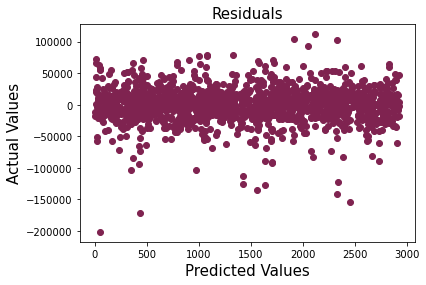

In [90]:
linear_regression(X=X_train,y=y_final)

#### LASSO Regression: Model 1 (Test Dataset)

In [91]:
# Scale/Fit Model
ss = StandardScaler()
ss.fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

In [92]:
Z_test.shape

(879, 35)

In [93]:
lasso = LassoCV(n_alphas=200)

In [94]:
# Fit Model
lasso.fit(Z_train, y_final)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(n_alphas=200)

In [95]:
# RMSE Z-Train
mean_squared_error(y_true=y_final, y_pred=lasso.predict(Z_train), squared=False)

27947.543129494767

In [96]:
# Predict Z-Test
sale_prediction = lasso.predict(Z_test)
sale_prediction

array([141684.01542129, 174127.12786897, 194128.64701039, 110040.74209823,
       183212.74261259,  85313.22632677, 120685.82998484, 162341.74761585,
       196203.25726666, 171188.84643656, 153711.36566546, 136320.50300241,
       171663.06360225, 238639.3876197 , 197317.09972975, 121329.79622909,
       118691.81601019, 128900.93394818, 213341.59699693, 182766.19843839,
       146945.56062826, 105234.11948531, 194679.32297087, 149915.5351869 ,
       193031.09686531, 115667.31993725, 114592.9985354 , 120105.10322661,
       132857.566437  ,  39373.47745398, 104560.7733292 ,  95283.67995266,
       224778.94086019, 135096.26607361, 230783.51941056, 183553.1275091 ,
       124444.37094451,  71803.466444  ,  92698.59627374, 206603.77105854,
       151476.98866337, 213791.90572261, 150721.60887188, 181575.48965918,
       208687.74394944, 108257.29664212, 214692.95480933, 102700.80865326,
       138361.24315858, 117842.61198185, 117550.6135629 , 206047.16957897,
       247843.85770045, 1

In [97]:
# Adding 'SalePrice' Column to Test Dataset
kaggle_test1['SalePrice'] = sale_prediction
kaggle_test1.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SawyerW,Somerst,StoneBr,Timber,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,190,9142,6,8,1910,1950,1020.0,1928,4,2,9,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,141684.015421
2718,90,9662,5,4,1977,1977,1967.0,1967,6,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174127.127869
2414,60,17104,7,5,2006,2006,654.0,1496,3,1,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,194128.647010
1989,30,8520,5,6,1923,2006,968.0,968,2,1,5,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110040.742098
625,20,9500,6,5,1963,1963,1394.0,1394,3,1,6,0,185,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,183212.742613


In [98]:
submission = kaggle_test1[['SalePrice']].sort_values(by='Id')
submission.head()

,SalePrice
Id,
2,130920.881027
4,262465.600350
6,188769.695607
7,261318.105006
17,211495.416857


In [99]:
# Submission to .CSV
submission.to_csv("./datasets/submission_1.csv", index=True)

### Cleaning Test Dataset: Model 2

In [100]:
kaggle_test2 = kaggle_test[['MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add','Total Bsmt SF','Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Enclosed Porch', 'Screen Porch',
        'Garage Area', 'Mas Vnr Area', 'Neighborhood']]

In [101]:
# One-Hot Encoding 'Neighborhood'
dummy = pd.get_dummies(kaggle_test2['Neighborhood'], drop_first=True)
kaggle_test2 = pd.concat([kaggle_test2, dummy], axis=1)

In [102]:
# Drop 'Neighborhood'
kaggle_test2.drop(columns=['Neighborhood'], inplace=True)

In [103]:
# Drop Neighborhoods not in Model 2
kaggle_test2.drop(columns=['Blueste', 'CollgCr', 'Greens', 'NPkVill', 'OldTown', 'SWISU', 'Sawyer', 'Timber', 'Veenker'], inplace=True)

In [104]:
# Checking Null Value
kaggle_test2[kaggle_test2['Mas Vnr Area'].isnull()]

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Garage Area,Mas Vnr Area,BrDale,BrkSide,ClearCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,SawyerW,Somerst,StoneBr
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
868,60,8749,7,5,2002,2002,840.0,1725,3,1,6,0,0,550.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# Filling Null Values with 0
kaggle_test2['Mas Vnr Area'] = kaggle_test2['Mas Vnr Area'].fillna(0)

In [106]:
X_test2 = kaggle_test2[['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Garage Area', 'Mas Vnr Area', 'BrDale', 'BrkSide', 'ClearCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NWAmes', 'NoRidge', 'NridgHt', 'SawyerW', 'Somerst',
       'StoneBr']]



In [107]:
# Defining Train
X_train2 = train_final2
X_train2.shape

(1883, 31)

In [108]:
X_test2.shape

(879, 31)

#### Linear Regression: Model 2 (Test Dataset)

Linear Regression R^2: 0.8882018529732403
Linear Regression Cross Validation: [0.87971865 0.88418168 0.88784707 0.87498897 0.87439524]
Root Mean Squared Error: 26924.049114084173

Linear Regression Train Cross Validation: [0.7970062  0.86175707 0.83166147 0.88065134 0.88624965]
Linear Regression Train R^2: 0.8756272251534238
Linear Regression Test R^2: 0.8913035471646376
Root Mean Squared Error Train: 28293.83710185913
Root Mean Squared Error Test: 26571.278932673245


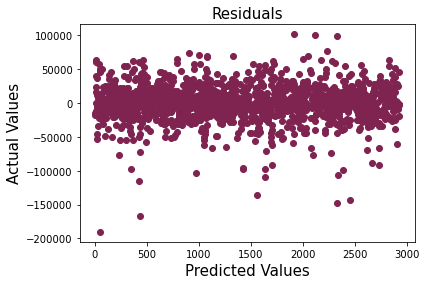

In [109]:
linear_regression(X=X_train2, y=y_final)

#### LASSO Regression: Model 2 (Test Dataset)

In [110]:
# Scale/Fit Model
ss = StandardScaler()
Z_train2 = ss.fit_transform(X_train2)
Z_test2 = ss.transform(X_test2)

In [111]:
lasso = LassoCV(n_alphas=200)

In [112]:
# Fit Model
lasso.fit(Z_train2, y_final)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(n_alphas=200)

In [113]:
# Predict Z-Test
sale_prediction2 = lasso.predict(Z_test2)
sale_prediction2

array([142313.25794464, 172903.01824331, 191140.63748009, 116242.95956312,
       187949.5440535 ,  87515.66024194, 120215.99867442, 154466.34650941,
       191878.01235355, 167851.93837508, 152569.14192301, 135915.99911422,
       165201.5963123 , 241598.832428  , 189794.51349664, 124861.18134616,
       131804.24979157, 127247.62940598, 208198.86720513, 181868.90535589,
       141803.46441316, 115460.07454614, 191122.28367204, 150903.2226096 ,
       192878.52366437, 114883.43753284, 113182.05304489, 118280.51324031,
       138826.24593572,  35523.55222631, 112641.75750545, 102664.79149485,
       233255.83729682, 130611.65458971, 233866.20095834, 184200.29846908,
       119530.74236545,  76991.35516134,  95712.65902606, 203432.64378816,
       152974.79775216, 210021.66821657, 154808.5138228 , 174655.31116126,
       210151.80663884, 101158.4729073 , 218677.45829041, 100700.42321192,
       133384.01160584, 113362.74178958, 110399.93363796, 209816.01153896,
       257124.22391483, 1

In [114]:
# Adding 'SalePrice' Column to Test Dataset
kaggle_test2['SalePrice'] = sale_prediction2
kaggle_test2.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Garage Area,Mas Vnr Area,BrDale,BrkSide,ClearCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,SawyerW,Somerst,StoneBr,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,190,9142,6,8,1910,1950,1020.0,1928,4,2,9,112,0,440.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142313.257945
2718,90,9662,5,4,1977,1977,1967.0,1967,6,2,10,0,0,580.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,172903.018243
2414,60,17104,7,5,2006,2006,654.0,1496,3,1,7,0,0,426.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,191140.637480
1989,30,8520,5,6,1923,2006,968.0,968,2,1,5,184,0,480.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116242.959563
625,20,9500,6,5,1963,1963,1394.0,1394,3,1,6,0,185,514.0,247.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,187949.544054


In [115]:
submission_2 = kaggle_test2[['SalePrice']].sort_values(by='Id')
submission_2.head()

,SalePrice
Id,
2,137527.165295
4,250847.068143
6,188993.256132
7,257550.095167
17,210832.615049


In [116]:
# Submission to .CSV
submission_2.to_csv("./datasets/submission_2.csv", index=True)

### Cleaning Test Dataset: Model 3

In [117]:
kaggle_test3 = kaggle_test[['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Garage Area', 'Mas Vnr Area', 'Neighborhood', 'Kitchen Qual', 'Exter Qual', 'Bsmt Exposure']]

In [118]:
# One-Hot Encoding 'Neighborhood', 'Exter Qual', 'Bsmt Exposure'
dummy_3 = pd.get_dummies(columns =['Neighborhood', 'Exter Qual', 'Bsmt Exposure'], drop_first=True, data=kaggle_test3)
kaggle_test3 = pd.concat([kaggle_test3, dummy_3], axis=1)

In [119]:
kaggle_test3 = kaggle_test3.loc[:,~kaggle_test3.columns.duplicated()]
kaggle_test3.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Garage Area', 'Mas Vnr Area', 'Neighborhood', 'Kitchen Qual',
       'Exter Qual', 'Bsmt Exposure', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Exter Qua

In [120]:
# Checking Null Value
kaggle_test3[kaggle_test3['Mas Vnr Area'].isnull()]

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Garage Area,Mas Vnr Area,Neighborhood,Kitchen Qual,Exter Qual,Bsmt Exposure,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
868,60,8749,7,5,2002,2002,840.0,1725,3,1,6,0,0,550.0,NaN,CollgCr,Gd,Gd,No,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [121]:
# Filling in Null Value with 0
kaggle_test3['Mas Vnr Area'] = kaggle_test3['Mas Vnr Area'].fillna(0)

In [122]:
X_test3 = kaggle_test3[['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Garage Area', 'Mas Vnr Area',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA', 'Bsmt Exposure_Gd',
       'Bsmt Exposure_Mn', 'Bsmt Exposure_No']]


In [123]:
# Defining X-Train
X_train3 = train_final3
X_train3.shape

(1883, 41)

In [124]:
X_test3.shape

(879, 41)

#### Linear Regression: Model 3 (Test Dataset)

Linear Regression R^2: 0.9151522622427368
Linear Regression Cross Validation: [0.90852261 0.91582401 0.9159176  0.89240788 0.90133819]
Root Mean Squared Error: 23455.41952168289

Linear Regression Train Cross Validation: [0.88486563 0.85141698 0.84315992 0.91273683 0.92574313]
Linear Regression Train R^2: 0.9073028697728425
Linear Regression Test R^2: 0.9170874340715486
Root Mean Squared Error Train: 24426.561238790597
Root Mean Squared Error Test: 23206.783486356555


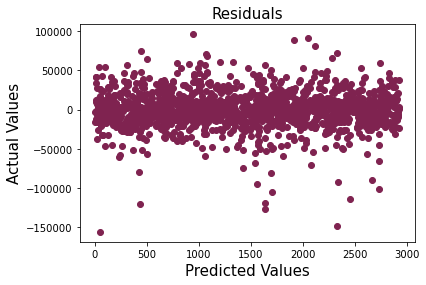

In [125]:
linear_regression(X=X_train3, y=y_final)

#### LASSO Regression: Model 3 (Test Dataset)

In [126]:
# Scale/Fit Model
ss = StandardScaler()
Z_train3 = ss.fit_transform(X_train3)
Z_test3 = ss.transform(X_test3)

In [127]:
lasso = LassoCV(n_alphas=200)

In [128]:
# Fit Model
lasso.fit(Z_train3, y_final)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(n_alphas=200)

In [129]:
# Predit Z-Test
sale_prediction3 = lasso.predict(Z_test3)
sale_prediction3

array([166482.96269539, 216481.17108824, 223576.34825195, 144475.21115956,
       206757.8715062 , 117060.46880116, 149141.89454054, 195705.25666516,
       176126.12716234, 194628.31182938, 226317.92247146, 158081.84058394,
       186578.10563365, 315011.57481739, 207809.50256181, 160640.95299311,
       150518.33895786, 151238.74953952, 228845.76095067, 202504.02568098,
       190474.14205737, 162917.36975472, 262259.28896575, 196461.94821896,
       264694.67881455, 159232.69151951, 148770.68630031, 147863.44437112,
       190911.32994677,  77221.90278725, 145775.40466705, 134273.34322682,
       255580.91275766, 168540.07656754, 253016.6746186 , 207237.98554136,
       153651.08246745, 144455.87379168, 142932.22604646, 187810.29990957,
       148730.07019305, 235483.56802031, 182619.34114221, 199980.25293237,
       234415.37240577, 128655.93066635, 241116.60634299, 183287.18760765,
       162621.80120617, 161996.4939773 , 137192.58216049, 229585.17723209,
       277633.24459929, 1

In [130]:
# RMSE
mean_squared_error(y_true=y_final, y_pred=lasso.predict(Z_train3), squared=False)

23474.00643796366

In [131]:
# Adding 'SalePrice' Column to Test Dataset
kaggle_test3['SalePrice'] = sale_prediction3

In [132]:
submission_3 = kaggle_test3[['SalePrice']].sort_values(by='Id')
submission_3.head()

,SalePrice
Id,
2,163818.350909
4,266731.453977
6,215933.109928
7,190972.982545
17,245042.270607


In [133]:
# Submission 3 to .CSV
submission_3.to_csv('./datasets/submission_3.csv', index=True)

## Conclusion and Recommendations

### Conclusion

- In conclusion, using the LASSO regression helped eliminate features with low or 0 coefficients.
- The root mean squared error was also typically lower when comparing the LASSO and linear regression models. 
- When comparing the residuals from the LASSO regression and linear regression, it seemed like the linear regression model was always closer to 0 while the LASSO models were more scattered.
- As I went from the baseline model to model 1, 2, and 3, and added different features the RMSE decreased.
- Because my RMSE was always higher when submitted into Kaggle, insisting that my model may still be overfit.

### Recommendations

Overall, based on these models, I have recommendations on the 5 best features that will impact values of sales price and 5 features that will lower the value of a home.

Ranking from highest to lowest is:
Ground living area, year built, total basement in square feet, overall material and finish quality, and the neighborhoods Stonebrook, Northridge Heights and Northridge would be great neighborhoods with higher selling price.

Based on the data, it would be beneficial for flippers to pay attention to these specific neighborhoods and to the overall size of the living room and basement when picking the property. It is also important to ensure that the overall material and finish quality is very good to excellent when renovating the home. It would also be important to pay attention to the year built, but I think because you are flipping a home, this may not be as significant if the renovations modernizes some of the outdated aspects of the home.

Ranking from highest to lowest again where highest has a more negative coefficient, the first is kitchen quality that is average or good, exterior quality that is average or good, the MS subclass, and neighborhoods Northwest Ames, North Ames, and Old Town.
In terms of flipping a house, in renovations, I think it is important to have a kitchen and exterior quality that is in excellent condition.

In terms of flipping a house, in renovations, it is important to have a kitchen and exterior quality that is in excellent condition.